Notebook to illustrate the functions and utilities present in basic_functions.py

In [1]:
from basic_functions import *

Make a z luminosity distance array that can be easily interpolated

In [2]:
z_array = np.linspace(0,10.,2000)
luminosity_distance_array = luminosity_distance(z_array, 70.5, 0.3)
cosmo_true_z_luminosity_distance_list = np.array([z_array, luminosity_distance_array])

Define parameters for a waveform

In [3]:
m1 = 1.4
m2 = 1.35
z = 1
theta = 1
effective_distance = np.interp(z, cosmo_true_z_luminosity_distance_list[0], cosmo_true_z_luminosity_distance_list[1])/theta
q = q_from_m1_m2(m1,m2)
lambda_tilde = lambda_tilde_from_m1_m2(m1,m2)
m_chirp = m_chirp_from_m1_m2(m1,m2)
m_chirp_z = m_chirp * (1+z)
    
keys = ['m_chirp_z', 'q', 'lambda_tilde', 'effective_distance', 'z']
values = [m_chirp_z, q, lambda_tilde, effective_distance, z]
pars = dict(zip(keys, values))
#print (lambda_tilde)

Define the detector PSD

In [4]:
freq, psd = np.loadtxt('CE_psd.txt', unpack=True)

Plot the waveform

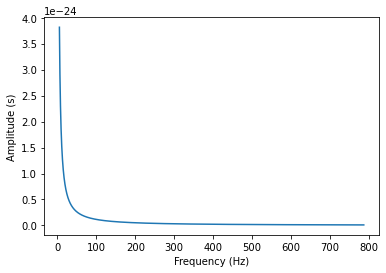

In [5]:
waveform = Waveform(pars, freq)
waveform.plot_waveform()

Calcultae the SNR. For this code SNR less than 10 may create problems.

In [6]:
print(waveform.snr(psd))

40.987411865228246


Plot log q, log lambda tilde, log luminosity distance samples

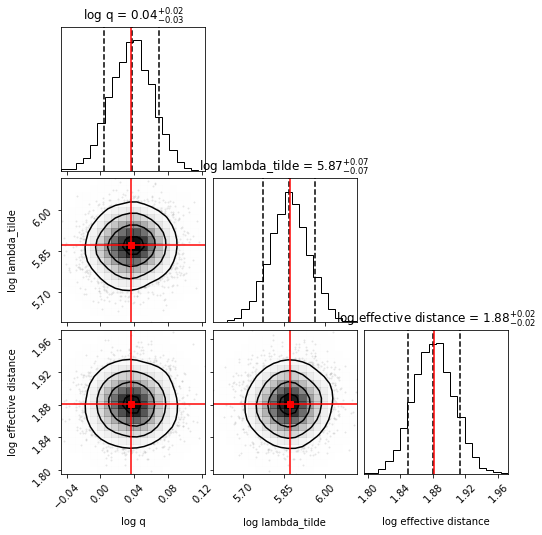

In [7]:
waveform.calculate_errors(psd)
waveform.make_log_q_log_lambda_tilde_samples()
waveform.plot_log_q_log_lambda_tilde_log_effective_distance_samples()


We make a grid of chirp mass, using log lambda tilde and log q as the axis and save it in a .txt file for reference

In [8]:
log_q_array = np.linspace(np.log(0.3),np.log(1),20)
log_lambda_tilde_array = np.linspace(4,10,20)
m_chirp_grid = m_chirp_grid_from_log_q_log_lambda_tilde(log_q_array,log_lambda_tilde_array)
np.savetxt('m_chirp_grid_using_SLY.txt', m_chirp_grid)


Make a imshow of chirp mass grid

Text(0, 0.5, 'log(lambda_tilde)')

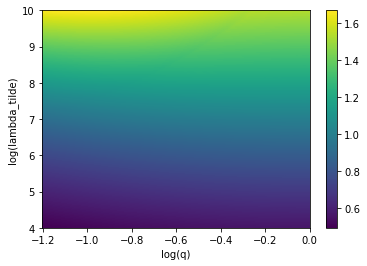

In [8]:
m_chirp_grid = np.loadtxt('m_chirp_grid_using_SLY150.txt')
plt.imshow(m_chirp_grid, extent=[np.log(0.3),np.log(1),4,10], aspect='auto')
plt.colorbar()
plt.xlabel('log(q)')
plt.ylabel('log(lambda_tilde)')

Now we look at chirp mass, log q and redshift samples

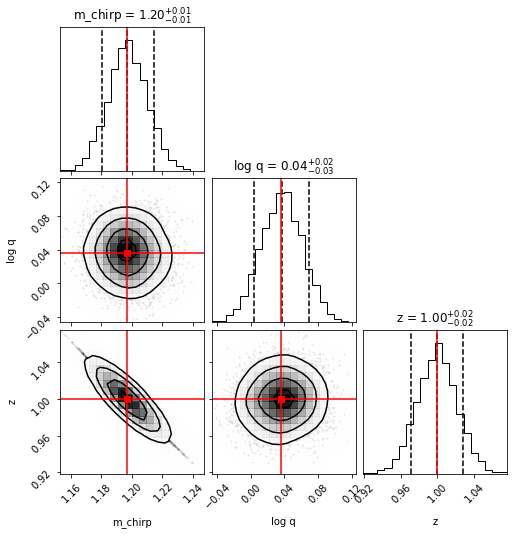

In [9]:
log_q_array = np.linspace(np.log(0.3),np.log(1),150)
log_lambda_tilde_array = np.linspace(4,10,150)
m_chirp_grid = np.loadtxt('m_chirp_grid_using_SLY150.txt')#m_chirp_grid_from_q_log_lambda_tilde(q_array,log_lambda_tilde_array)
waveform.make_z_m_chirp_samples(m_chirp_grid, log_q_array, log_lambda_tilde_array)
waveform.plot_m_chirp_log_q_z()

Lets make a population of 500 optimally aligned events

In [3]:
n_events = 500
m_chirp_population = np.random.uniform(1, 1.4, n_events)
q_population = np.random.uniform(0.7, 0.95, n_events)
lambda_tilde_population = lambda_tilde_from_m_chirp_q(m_chirp_population, q_population)
z_population = np.random.beta(3,9,n_events)*10
theta_population = np.ones(n_events)#np.random.beta(2,4,n_events)
effective_distance_population = np.interp(z_population, cosmo_true_z_luminosity_distance_list[0], cosmo_true_z_luminosity_distance_list[1])/theta_population
m_chirp_z_population = m_chirp_population * (1+z_population)


NameError: name 'cosmo_true_z_luminosity_distance_list' is not defined

Study the SNR distribution of events

In [ ]:
snr_population = np.zeros(n_events)
for n_events_ in range(n_events):
    pars_ = dict(zip(keys, [m_chirp_z_population[n_events_], q_population[n_events_], lambda_tilde_population[n_events_], effective_distance_population[n_events_], z_population[n_events_]]))
    waveform_ = Waveform(pars_, freq)
    snr_population[n_events_]  = waveform_.snr(psd)

#Make a histogram of the SNR values
plt.hist(snr_population, bins=100)
plt.xlabel('SNR')
plt.ylabel('Number of events')
plt.show()
print (np.min(snr_population))

    

We make an array of measured redshift, errors on log effective distance  

In [ ]:
redshift_measured = np.zeros(n_events)
log_effective_distance_error = np.zeros(n_events)
for n_events_ in range(n_events):
    if n_events_%10 == 0: print(n_events_)
    pars_ = dict(zip(keys, [m_chirp_z_population[n_events_], q_population[n_events_], lambda_tilde_population[n_events_], effective_distance_population[n_events_], z_population[n_events_]]))
    waveform_ = Waveform(pars_, freq)
    waveform_.calculate_errors(psd)
    waveform_.make_log_q_log_lambda_tilde_samples()
    waveform_.make_z_m_chirp_samples(m_chirp_grid, log_q_array, log_lambda_tilde_array)
    redshift_measured[n_events_] = np.median(waveform_.z_samples)
    log_effective_distance_error[n_events_] = waveform_.log_effective_distance_error
  

Plot how many sigmas the effective distance due to the measured redshift are off frue the true effective distance 

In [ ]:
effective_distance_from_redshift_measured = np.interp(redshift_measured, cosmo_true_z_luminosity_distance_list[0], cosmo_true_z_luminosity_distance_list[1])
sigma_from_effective_distance = (effective_distance_from_redshift_measured - effective_distance_population)/(log_effective_distance_error * effective_distance_population)
#Plot the redshift population vs sigma from effective distance
plt.plot(redshift_measured, sigma_from_effective_distance, '.')
plt.xlabel('Redshift measured')
plt.ylabel('Sigma from effective distance')
plt.show()




Plot redshift measured vs log effective distance population

[70.52081487  0.29948697] [[ 2.18389560e-05 -4.24027497e-07]
 [-4.24027497e-07  1.03932627e-08]]


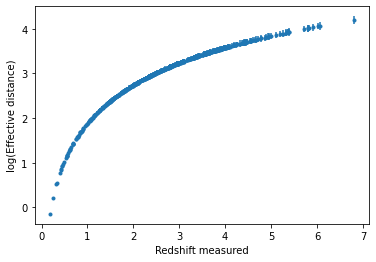

In [27]:
from scipy.optimize import curve_fit
plt.errorbar(redshift_measured, np.log(effective_distance_population), yerr=log_effective_distance_error, fmt='.')
plt.xlabel('Redshift measured')
plt.ylabel('log(Effective distance)')
#fit using scipy.optimize.curve_fit
def func(z, H_0, Omega_m):
    z_array = np.linspace(0.0001,10.,2000)
    luminosity_distance_array = luminosity_distance(z_array, H_0, Omega_m)
    cosmo_true_z_luminosity_distance_list = np.array([z_array, luminosity_distance_array])
    return np.log(np.interp(z, cosmo_true_z_luminosity_distance_list[0], cosmo_true_z_luminosity_distance_list[1]))
    
popt, pcov = curve_fit(func, redshift_measured, np.log(effective_distance_population), sigma=log_effective_distance_error)
print (popt, pcov)

Lets have a look at first 500 samples in data_seed_70.h5



In [14]:
n_events = 3001
FNAME = 'data_seed_70.h5'
f = h5py.File(FNAME, "r")
chirp_mass_prior_bounds = np.array([1,1.4])
log_q_prior_bounds = np.log(np.array([0.7, 0.95]))
effective_distance_population = f['effective distance population'][:n_events]
z_population = f['redshift population'][:n_events]
z_measured = []
zplus1_measured = []
zplus1_error = []
z_error = []
log_effective_distance_error = []
for n_events_ in range(n_events):
    if n_events_%500 == 0: print(n_events_)
    z_samples = f['z_samples'+str(n_events_)][:]
    z_measured.append(np.median(z_samples))
    z_error.append(np.std(z_samples))
    zplus1_measured.append(np.median(1+z_samples))
    zplus1_error.append(np.std(1+z_samples))
    log_effective_distance_error.append(np.array(f['log_effective_distance_error'+str(n_events_)]))

log_effective_distance_error = np.array(log_effective_distance_error)
z_error = np.array(z_error)
z_measured = np.array(z_measured)
zplus1_error = np.array(zplus1_error)
zplus1_measured = np.array(zplus1_measured)
        

0
500
1000
1500
2000
2500
3000


Plot of $\delta$z vs z

Text(0.5, 0, 'z')

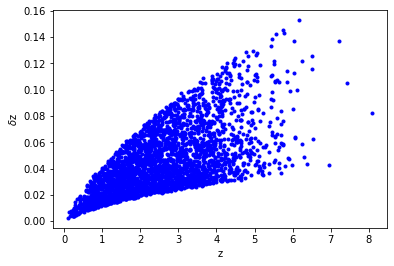

In [11]:
plt.plot(z_measured, np.array(z_error),  '.b')
plt.ylabel(r'$\delta$z')
plt.xlabel('z')

Plot of $\delta$z/z vs z

Text(0.5, 0, 'z')

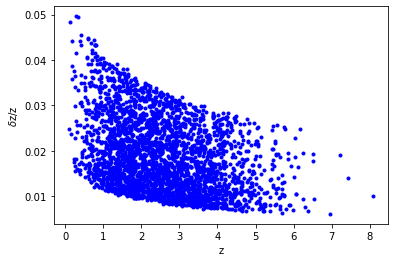

In [12]:
plt.plot(z_measured, np.array(z_error)/np.array(z_measured),  '.b')
plt.ylabel(r'$\delta$z/z')
plt.xlabel('z')

Plot of $\frac{\delta (1+z)}{1+z}$ vs z

Text(0.5, 0, 'z')

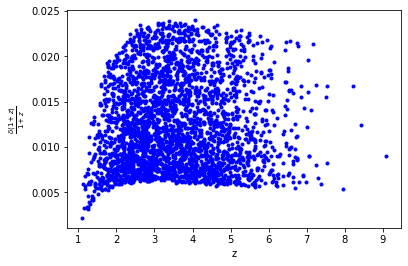

In [20]:
plt.plot(zplus1_measured, np.array(zplus1_error)/np.array(zplus1_measured),  '.b')
plt.ylabel(r'$\frac{\delta (1+z)}{1+z}$')
plt.xlabel('z')

Plot how many sigmas the effective distance due to the measured redshift are off frue the true effective distance 

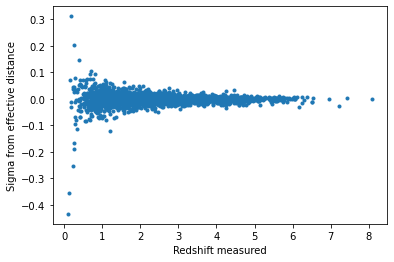

In [29]:
effective_distance_from_redshift_measured = np.interp(z_measured, cosmo_true_z_luminosity_distance_list[0], cosmo_true_z_luminosity_distance_list[1])
sigma_from_effective_distance = (effective_distance_from_redshift_measured - effective_distance_population)/(log_effective_distance_error * effective_distance_population)
#Plot the redshift population vs sigma from effective distance
plt.plot(z_measured, sigma_from_effective_distance, '.')
plt.xlabel('Redshift measured')
plt.ylabel('Sigma from effective distance')
plt.show()

[70.47962893  0.3003476 ] [[ 3.19626120e-06 -6.15286160e-08]
 [-6.15286160e-08  1.54492941e-09]]


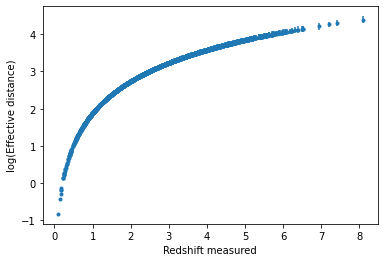

In [21]:
from scipy.optimize import curve_fit
plt.errorbar(z_measured, np.log(effective_distance_population), yerr=log_effective_distance_error, fmt='.')
plt.xlabel('Redshift measured')
plt.ylabel('log(Effective distance)')
#fit using scipy.optimize.curve_fit
def func(z, H_0, Omega_m):
    z_array = np.linspace(0.0001,10.,2000)
    luminosity_distance_array = luminosity_distance(z_array, H_0, Omega_m)
    cosmo_true_z_luminosity_distance_list = np.array([z_array, luminosity_distance_array])
    return np.log(np.interp(z, cosmo_true_z_luminosity_distance_list[0], cosmo_true_z_luminosity_distance_list[1]))
    
popt, pcov = curve_fit(func, z_measured, np.log(effective_distance_population), sigma=log_effective_distance_error)
print (popt, pcov)

Check lambda_tilde interpolation

In [30]:
m1=1.2
m2 =1.
q = q_from_m1_m2(m1,m2)
mc = m_chirp_from_m1_m2(m1,m2)
lambda_tilde = lambda_tilde_from_m_chirp_q(mc , q)
print (mc)
log_q_array = np.linspace(np.log(0.3),np.log(1),150)
log_lambda_tilde_array = np.linspace(4,10,150)
m_chirp_grid = np.loadtxt('m_chirp_grid_using_SLY150.txt')
m_chirp_grid_interp = interp2d(log_q_array,log_lambda_tilde_array,m_chirp_grid)
print(m_chirp_grid_interp(np.log(q), np.log(lambda_tilde)))

0.9528492828960993
[0.95419118]
